## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test data comp files'


In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [5]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')
folders

['Datasets/train\\diseased cotton leaf',
 'Datasets/train\\diseased cotton plant',
 'Datasets/train\\fresh cotton leaf',
 'Datasets/train\\fresh cotton plant']

In [7]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   shuffle = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 61 steps, validate for 1 steps
Epoch 1/20
61/61 [==============================] - 74s 1s/step - loss: 1.5404 - accuracy: 0.6786 - val_loss: 3.1393 - val_accuracy: 0.4444
Epoch 2/20
61/61 [==============================] - 39s 632ms/step - loss: 0.5805 - accuracy: 0.8590 - val_loss: 2.9233 - val_accuracy: 0.5556
Epoch 3/20
61/61 [==============================] - 35s 575ms/step - loss: 0.5283 - accuracy: 0.8713 - val_loss: 4.8637 - val_accuracy: 0.5000
Epoch 4/20
61/61 [==============================] - 37s 603ms/step - loss: 0.7878 - accuracy: 0.8539 - val_loss: 8.3253 - val_accuracy: 0.3889
Epoch 5/20
61/61 [==============================] - 33s 545ms/step - loss: 0.4493 - accuracy: 0.9042 - val_loss: 3.8526 - val_accuracy: 0.4444
Epoch 6/20
61/61 [==============================] - 33s 535ms/step - loss: 0.5634 - accuracy: 0.8985 - val_loss: 4.6641 -

In [15]:
import matplotlib.pyplot as plt

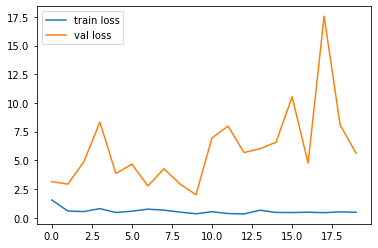

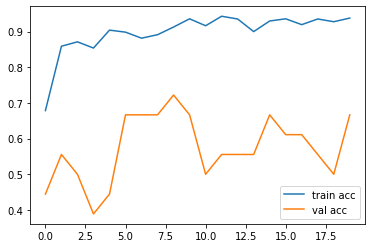

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [18]:

y_pred = model.predict(test_set)


In [19]:
y_pred

array([[3.3445793e-30, 4.7512510e-01, 4.9534774e-13, 5.2487487e-01],
       [1.4060412e-38, 1.0000000e+00, 4.0177187e-27, 3.8526265e-22],
       [3.4624024e-17, 3.4743312e-07, 6.0108541e-06, 9.9999368e-01],
       [1.7350465e-12, 9.8945075e-01, 7.6694484e-04, 9.7823199e-03],
       [1.1387580e-11, 3.1779651e-10, 1.0000000e+00, 9.2318644e-13],
       [1.0519691e-21, 9.9590379e-01, 9.5068913e-17, 4.0962840e-03],
       [9.8882872e-01, 4.5835688e-12, 7.4004318e-04, 1.0431247e-02],
       [2.2174410e-27, 1.7518101e-08, 1.0000000e+00, 9.2925995e-21],
       [5.2948923e-18, 6.6398108e-19, 1.0000000e+00, 3.9431150e-15],
       [4.2071397e-37, 1.0000000e+00, 5.8594229e-30, 3.6332757e-22],
       [3.6600589e-09, 7.4361300e-10, 9.4152832e-01, 5.8471665e-02],
       [2.8516247e-24, 1.0000000e+00, 2.1180630e-18, 1.5620182e-14],
       [4.3623440e-06, 4.8702603e-08, 9.9999487e-01, 6.8178178e-07],
       [3.9593083e-35, 1.0000000e+00, 1.2226471e-17, 2.4603162e-18],
       [1.3206865e-13, 1.0000000e+

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([3, 1, 3, 1, 2, 1, 0, 2, 2, 1, 2, 1, 2, 1, 1, 1, 3, 1], dtype=int64)

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model=load_model('model_resnet50.h5')

In [ ]:
img=image.load_img('Datasets/test/diseased cotton leaf/dis_leaf (248)',target_size=(224,224))

In [1]:
x=image.img_to_array(img)
x

NameError: name 'image' is not defined

In [ ]:
x.shape

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)